## Analysing the popularity of person names across years

In [1]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn

In [2]:
%matplotlib inline

In [3]:
names_all = []
type(names_all)

list

In [4]:
names_all = []

for year in range(1880,2014+1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year),names=['name','sex','number']))
    names_all[-1]['year'] = year

allyears = pd.concat(names_all)
allyears

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


## Function to identify the most common boy and girl name given the year

In [5]:

def mostname(year):
    
    all_index = allyears.set_index('year')
    year_df = all_index.loc[year]
    #gp = year_df.set_index(['sex','name']).max(axis = 1,level=0).groupby('sex').head(1)
    gp = year_df.set_index(['sex','name']).sort_values(by = 'number',ascending = False).groupby('sex').head(1) 
    
    return gp

mostname(2014)

,,number
sex,name,
F,Emma,20799
M,Noah,19144


## Plot of 4 names and their usages across years

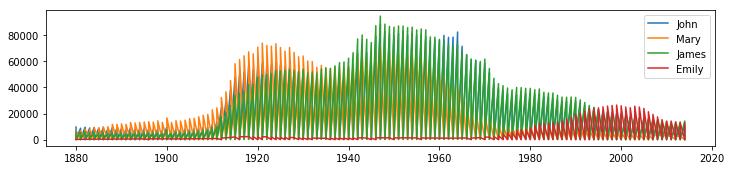

In [6]:

pp.figure(figsize=(12,2.5))

names = ['John','Mary','James','Emily']
#names = 'John'
for name in names:
    allyear_index = allyears.set_index(['name','year']).sort_index(ascending = False)
    data = allyear_index.loc[name]
#data
    x = data.index
    y = data['number']
    pp.plot(x,y)
pp.legend(names)
    
    
        


## Given the name and year to get the usage of names across genders

In [13]:

names = 'John'
year = 2014

allyear_index = allyears.set_index(['name','year']).sort_index(ascending = False)
data = allyear_index.loc[names].loc[year]
data

,sex,number
year,,
2014,F,14
2014,M,10600


## Plot of name counts (with male and female counts summed up for an year) across years

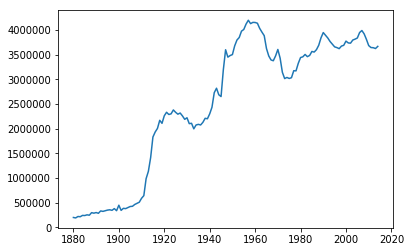

In [14]:

ally_index = allyears.set_index(['name','year','sex']).groupby(['year']).sum(axis = 1)
ally_index
pp.plot(ally_index.index,ally_index.values)


## Plot of  male and female name counts across years

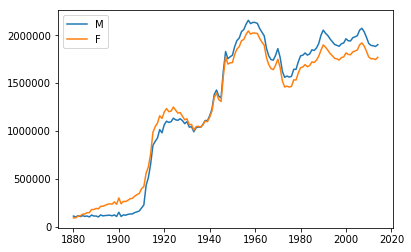

In [9]:

ally_index = allyears.set_index(['name','year','sex']).groupby(['sex','year']).sum(axis = 1)
ally_index

sexes = ['M','F']
for sex in sexes:
    t = ally_index.loc[sex]
    pp.plot(t.index,t.values)

pp.legend(sexes)
#pp.plot(ally_index.index,ally_index.values)

## Sum count of male and female names from 1800-2014

In [10]:

ally_index = allyears.set_index(['name','year','sex']).groupby(['sex']).sum(axis = 1)
ally_index

,number
sex,
F,167070477
M,170064949


## Plot of a particular (unisex) name usage across years

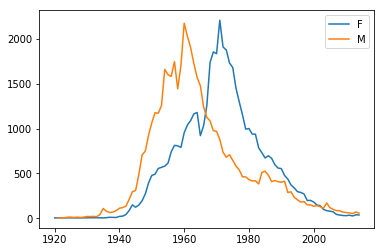

In [11]:

ally_index = allyears.set_index(['name','sex','year']).loc['Kerry']
#ally_index
sexes = ['F','M']

for sex in sexes:
    t = ally_index.loc[sex]
    pp.plot(t.index,t.values)

pp.legend(sexes)

## Plot of maximum count of male and female names across each year

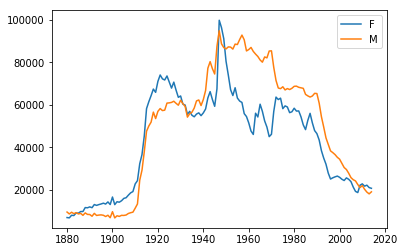

In [12]:

maxi_index = allyears.sort_values(['year','number'],ascending = [True,False]).groupby(['sex','year']).head(1)
maxi_reindex = maxi_index.set_index(['sex','year'])
maxi_reindex

sexes = ['F','M']

for sex in sexes:
    t = maxi_reindex.loc[sex].drop('name',axis = 1)
    pp.plot(t.index,t.values)

pp.legend(sexes)

